# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [22]:
# Your code
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# reading the dataset
data = pd.read_csv('dataset.csv')

# get a 95% sample with seed (Andreas' MatNr)
sampled_data = data.sample(frac=0.95, random_state=378233)

sampled_data.head()

Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
574311      574311        282163  2015      6   24            3      OO   
498532      498532        418961  2015      1   30            5      MQ   
306002      306002        628472  2015      2   26            4      OO   
87164        87164        366800  2015      8    2            7      WN   
735595      735595        413957  2015     10   18            7      AA   

        FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  ... CANCELLED  \
574311           4478      N800SK            ORD  ...         0   
498532           3256      N635MQ            ORD  ...         0   
306002           5650      N964SW            MOT  ...         0   
87164            4190      N7739A            MDW  ...         0   
735595            280      N7ASAA            DFW  ...         0   

        CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
574311                    N               0.0             0.0          401.0   
498532                    N               0.0             0.0           43.0   
306002                    N               0.0             0.0            0.0   
87164                     N               5.0             0.0            5.0   
735595                    N               0.0             0.0           24.0   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
574311                  0.0            0.0         175    25   
498532                  0.0            0.0          30     4   
306002                 17.0            0.0          57     8   
87164                 108.0            0.0         214    30   
735595                  0.0            0.0         291    41   

        SCHEDULED_DEPARTURE_CATEGORY  
574311                       Morning  
498532                       Morning  
306002                     Afternoon  
87164                        Evening  
735595                       Evening  

[5 rows x 36 columns]

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [23]:
col_cancel_reason = sampled_data['CANCELLATION_REASON']

# getting the unique values from the canelation reason column
cancel_reasons = col_cancel_reason.unique()

# get all cancelled flights
cancelled = sampled_data.query("CANCELLED == 1")
cancelled_reasons = cancelled["CANCELLATION_REASON"].unique()

# get all non cancelled flights
not_cancelled = sampled_data.query("CANCELLED == 0")
not_cancelled_reasons = not_cancelled["CANCELLATION_REASON"].unique()

print(cancel_reasons)
print(cancelled_reasons)
print(not_cancelled_reasons)


['N' 'B' 'C' 'A' 'D']
['B' 'C' 'A' 'D']
['N']


    Your answer: Is more required? What are the cancellation reasons?

The unique values of CANCELLATION_REASON are ['A', 'B', 'C', 'D', 'N']. While the values ['A', 'B', 'C', 'D'] correspond to a reason for cancellation, the value ['N'] corresponds to the fact, that there was no cancellation.
    


#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [24]:
# drop all rows with any Null values
no_null_data = sampled_data.dropna()

# get and print all unique values of CANCELLATION_REASON column
values = no_null_data["CANCELLATION_REASON"].unique()
print(values)

# demonstrate where NaN values occur in cancelled flights
cancelled.head()

['N']


Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
651602      651602          3063  2015      1    8            4      MQ   
144458      144458           436  2015      1    1            4      OO   
87117        87117          5993  2015      1   23            5      EV   
351627      351627         88100  2015     12   28            1      WN   
180694      180694         26743  2015      2   23            1      AA   

        FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  ... CANCELLED  \
651602           3029      N520MQ            SYR  ...         1   
144458           5563      N932EV            DEN  ...         1   
87117            5348      N724EV            DTW  ...         1   
351627            247      N7730A            MDW  ...         1   
180694           1642      N3EHAA            DFW  ...         1   

        CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
651602                    B               NaN             NaN            NaN   
144458                    C               NaN             NaN            NaN   
87117                     A               NaN             NaN            NaN   
351627                    B               NaN             NaN            NaN   
180694                    B               NaN             NaN            NaN   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
651602                  NaN            NaN           8     1   
144458                  NaN            NaN           1     0   
87117                   NaN            NaN          23     3   
351627                  NaN            NaN         362    51   
180694                  NaN            NaN          54     7   

        SCHEDULED_DEPARTURE_CATEGORY  
651602                     Afternoon  
144458                       Evening  
87117                      Afternoon  
351627                     Afternoon  
180694                       Morning  

[5 rows x 36 columns]

    Your answer: 
    
There is no cancelled flies in the table with no NaN values, since all cancelled flights have NaN in their _DELAY columns, because cancelled flights cannot have delays. This explains "N" being the only value in the CANCELLATION_REASON column of <b>no_null_data</b>.
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

<Figure size 1440x1440 with 0 Axes>

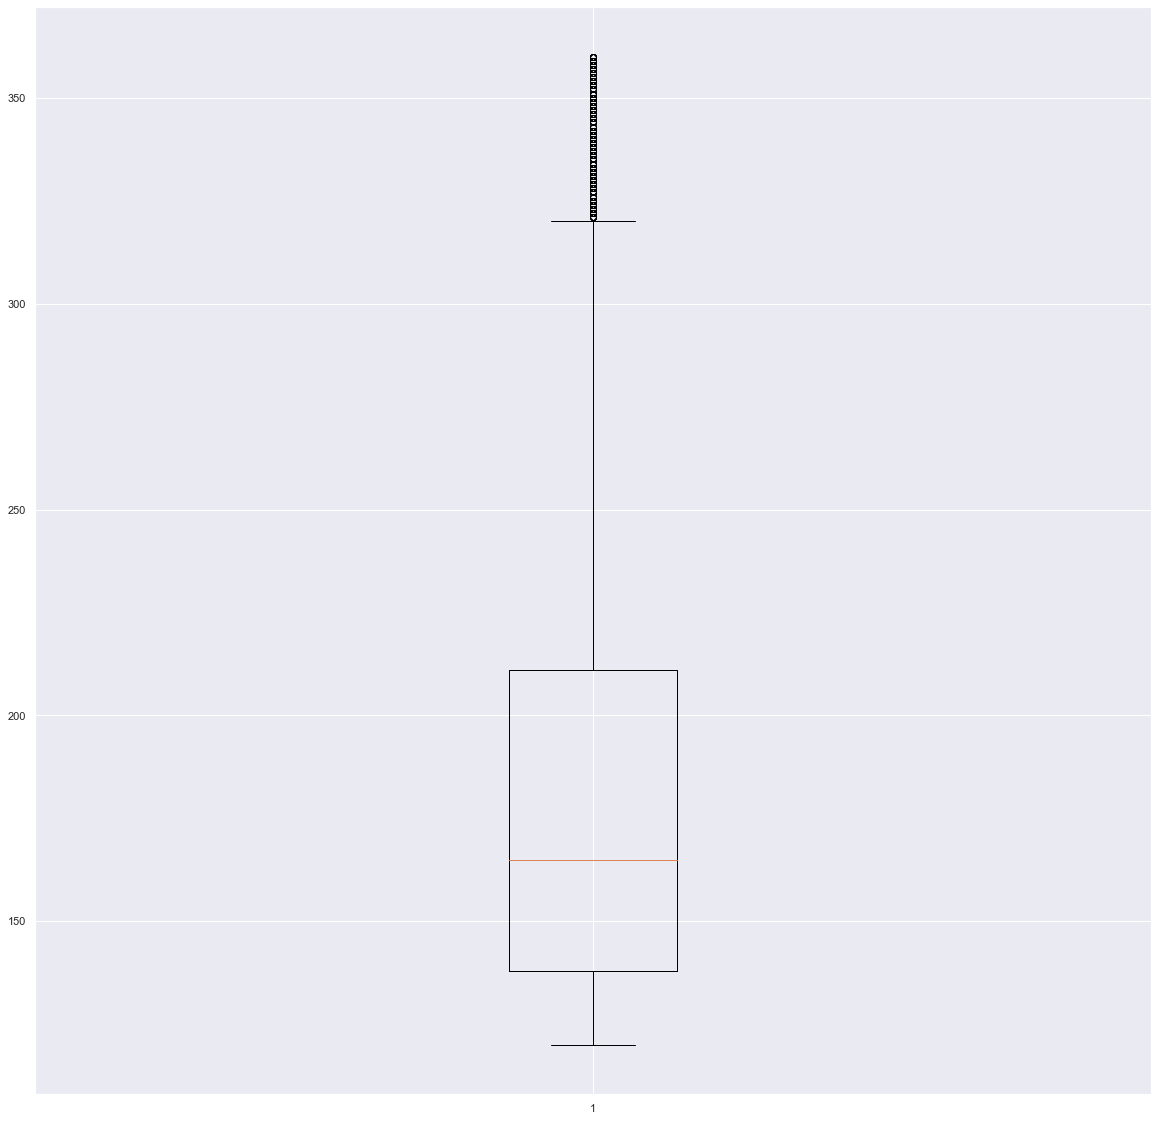

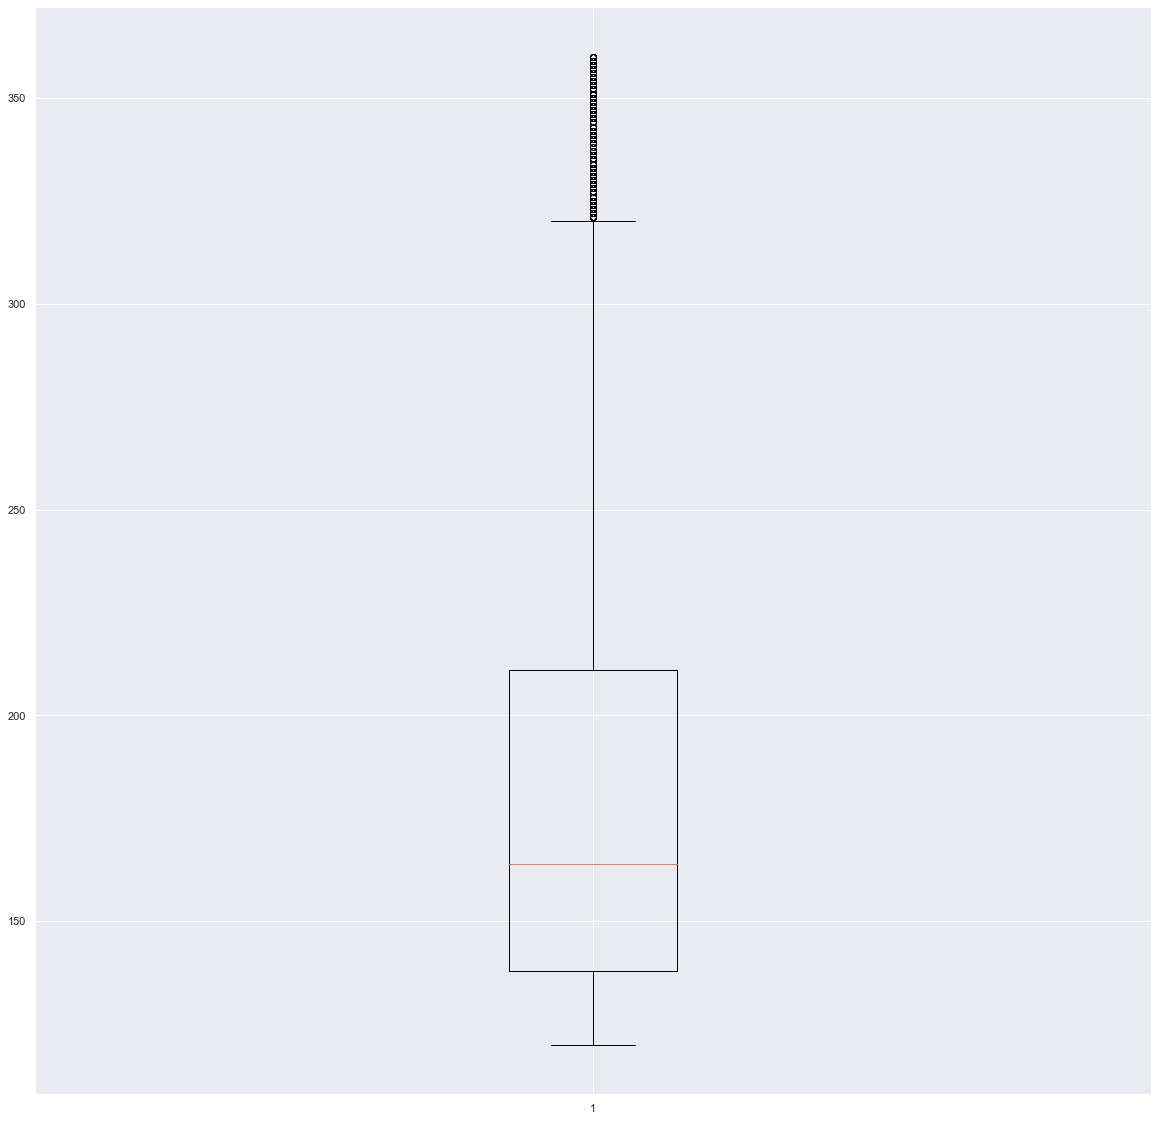

<Figure size 1440x1440 with 0 Axes>

In [25]:
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

ev_data = no_null_data.loc[(no_null_data['AIRLINE'] == 'EV') 
                           & (no_null_data['ARRIVAL_DELAY']>=120) 
                           & (no_null_data['ARRIVAL_DELAY']<=360)]

boxplot_infos = boxplot_stats(ev_data['LATE_AIRCRAFT_DELAY']) 
whis_lo_aircraft= boxplot_infos[0]['whislo']
whis_hi_aircraft = boxplot_infos[0]['whishi']
cleaned_data_late_aircraft = ev_data.loc[(ev_data['LATE_AIRCRAFT_DELAY'] >=whis_lo_aircraft) & (ev_data['LATE_AIRCRAFT_DELAY']<=whis_hi_aircraft)]

boxplot_infos = boxplot_stats(ev_data['AIR_SYSTEM_DELAY']) 
whis_lo_system= boxplot_infos[0]['whislo']
whis_hi_system = boxplot_infos[0]['whishi']
cleaned_data_late_air_system = ev_data.loc[(ev_data['AIR_SYSTEM_DELAY'] >=whis_lo_system) & (ev_data['AIR_SYSTEM_DELAY']<=whis_hi_system)]

plt.boxplot(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
plt.figure()

plt.boxplot(cleaned_data_late_air_system['ARRIVAL_DELAY'])
plt.figure()

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [26]:
from scipy import stats
import numpy as np

def stat_features(dataset):
    features_list = {}
    features_list['Median'] = np.median(dataset)
    features_list['Mean'] = np.mean(dataset)
    features_list['Mode'] = stats.mode(dataset)[0][0]
    features_list['Standard Deviation'] = np.std(dataset)
    features_list['Variance'] = np.var(dataset)
    for key in features_list:
        print(key + ":", str(features_list[key]))

print('ev_data : ')
stat_features(ev_data.ARRIVAL_DELAY)

print('\ncleaned_data_air_system : ')
stat_features(cleaned_data_late_air_system.ARRIVAL_DELAY)

print('\ncleaned_data_late_aircraft : ')
stat_features(cleaned_data_late_aircraft.ARRIVAL_DELAY)

ev_data : 
Median: 165.0
Mean: 181.7911306042885
Mode: 121.0
Standard Deviation: 55.16793552796444
Variance: 3043.5011104176406

cleaned_data_air_system : 
Median: 164.0
Mean: 181.26620721878285
Mode: 123.0
Standard Deviation: 55.12065782464976
Variance: 3038.2869190221227

cleaned_data_late_aircraft : 
Median: 165.0
Mean: 181.47798066595058
Mode: 121.0
Standard Deviation: 54.73673067560951
Variance: 2996.109685054211


    Your answer: 
The output of the above method showcases the different statistical features for the 3 datasets. First, we should recall how we transformed the data:

We took a random 95% of the original dataset, removed all rows where some feature had the value null (which resulted in dropping all cancellations), then filtered the data to contain flights only from the airline EV, and then filtered the data to have an AIRLINE_DELAY x, which should be 120 <= x <= 360. We called that dataset ev_data.

Out of ev_data, we created two more datasets:
For the first, we took a look at the feature LATE_AIRCRAFT_DELAY and calculated a boxplot for it. Thus, we could take a look at all outliers of the feature LATE_AIRCRAFT_DELAY, and deleted all rows from ev_data that contained such an outlier. We called that dataset cleaned_data_late_aircraft.

For the second one, we did the same thing but with the feature AIR_SYSTEM_DELAY.

It has to be noted that removing outliers is a dangerous approach that needs domain knowledge to decide whether or not is a good decision.

Furthermore, it has to be noted that all the removed outliers (in both datasets) were top outliers. Meaning, they were located above the upper fence. That means we removed very high values for the corresponding features in the dataset.

If we now take a look at the statistical features of the column ARRIVAL_DELAY, one can see that removing said outliers made a slight improvement on the scattering of the values.

While the median, mean and mode do not show a lot of change across all three datasets highlighting that the core information of the dataset remains unchanged, the other calculated statistical features showcase the impact.

We observe, that both cleaned datasets have lower std. deviation and variance than the original data, meaning that the values are now on average closer to the datasets mean value.

This could also be seen as an affirmation of quality of the original data, since eliminating two types of outliers did not massively impact the statistical properties of the data.



### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

<AxesSubplot:xlabel='MONTH', ylabel='ARRIVAL_DELAY'>

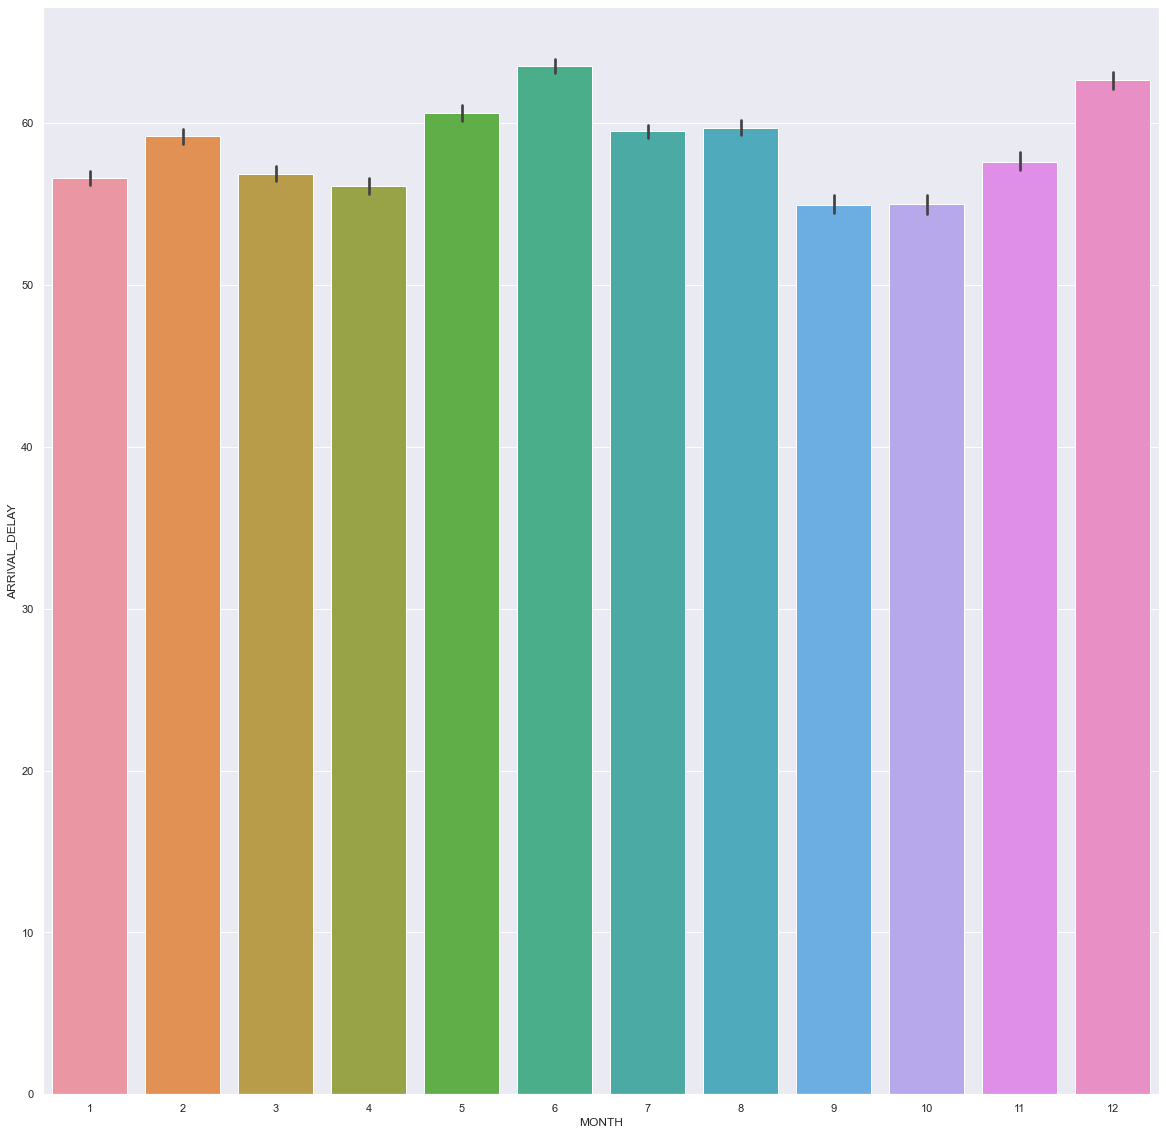

In [27]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(20,20)})

#standard estimator of barplot is the mean, thus no specification required
sns.barplot(x="MONTH", y="ARRIVAL_DELAY", data=no_null_data)

    Your answer:
The 9th (September) and 10th (October) month of the year are to be preffered, since the ARRIVAL_DELAY is the lowest there. The worst to months are the 12th (December) and the 6th (June).
    
    

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

<AxesSubplot:xlabel='MONTH', ylabel='WEATHER_DELAY'>

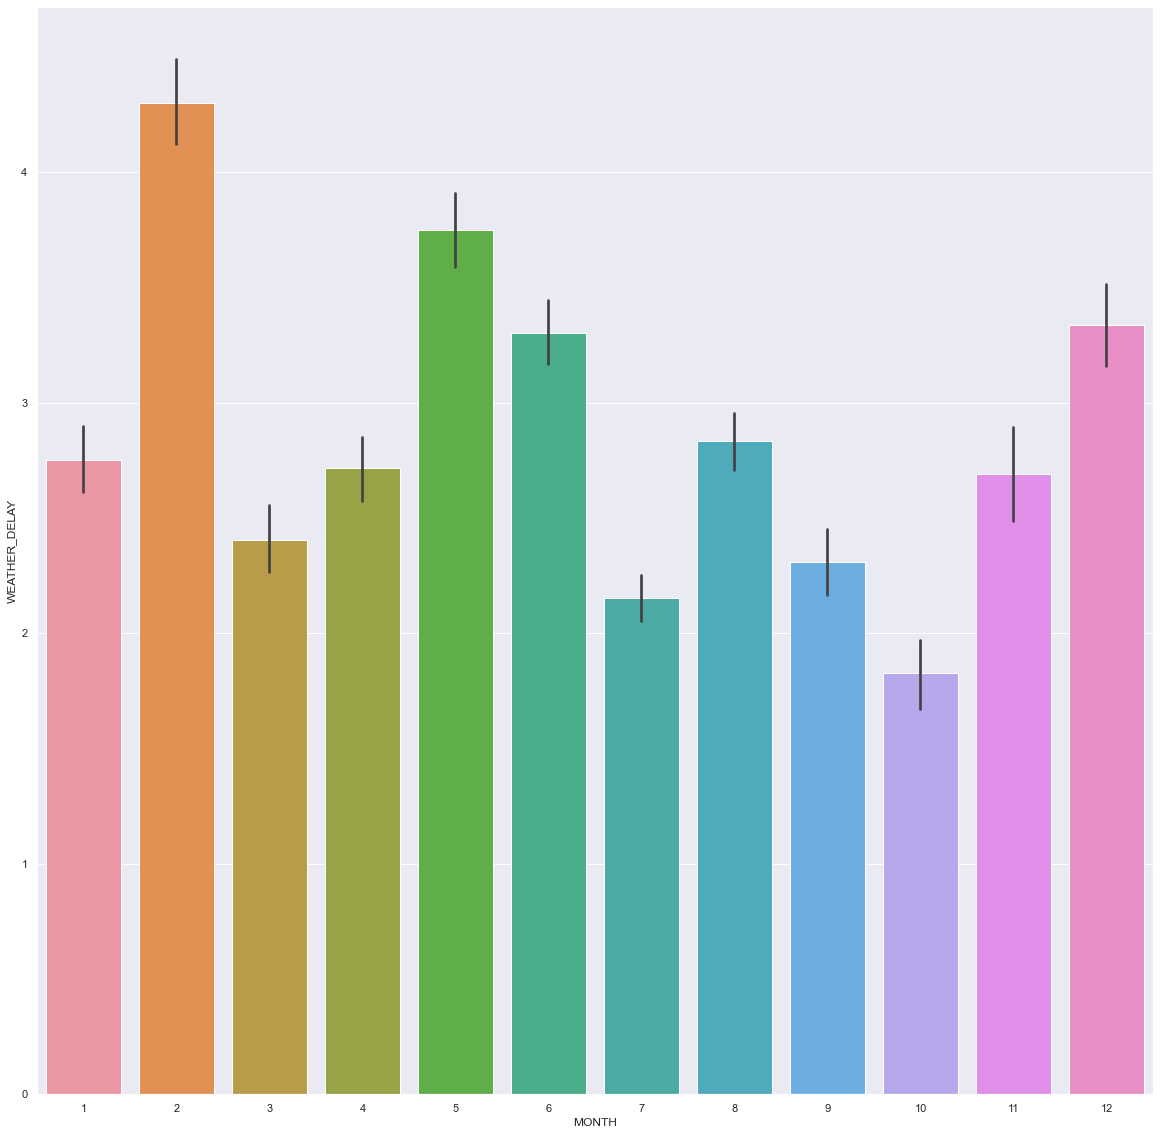

In [28]:
# plot weather delays
sns.barplot(x="MONTH", y="WEATHER_DELAY", data=no_null_data)

    Your answer:

The minimum weather delay is in October, while the maximum weather delay is in February.

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
The arrival delay is the lowest in October, which is where the weather delay also is the lowest.

The highest weather delay is in February, where the arrival delay is also very high. One can see that in June and December (where the arrival delay is at its maximum) the weather delay is also very high. 

There might be a correlation of the two features ARRIVAL_DELAY and WEATHER_DELAY.

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

<AxesSubplot:xlabel='MONTH', ylabel='ARRIVAL_DELAY'>

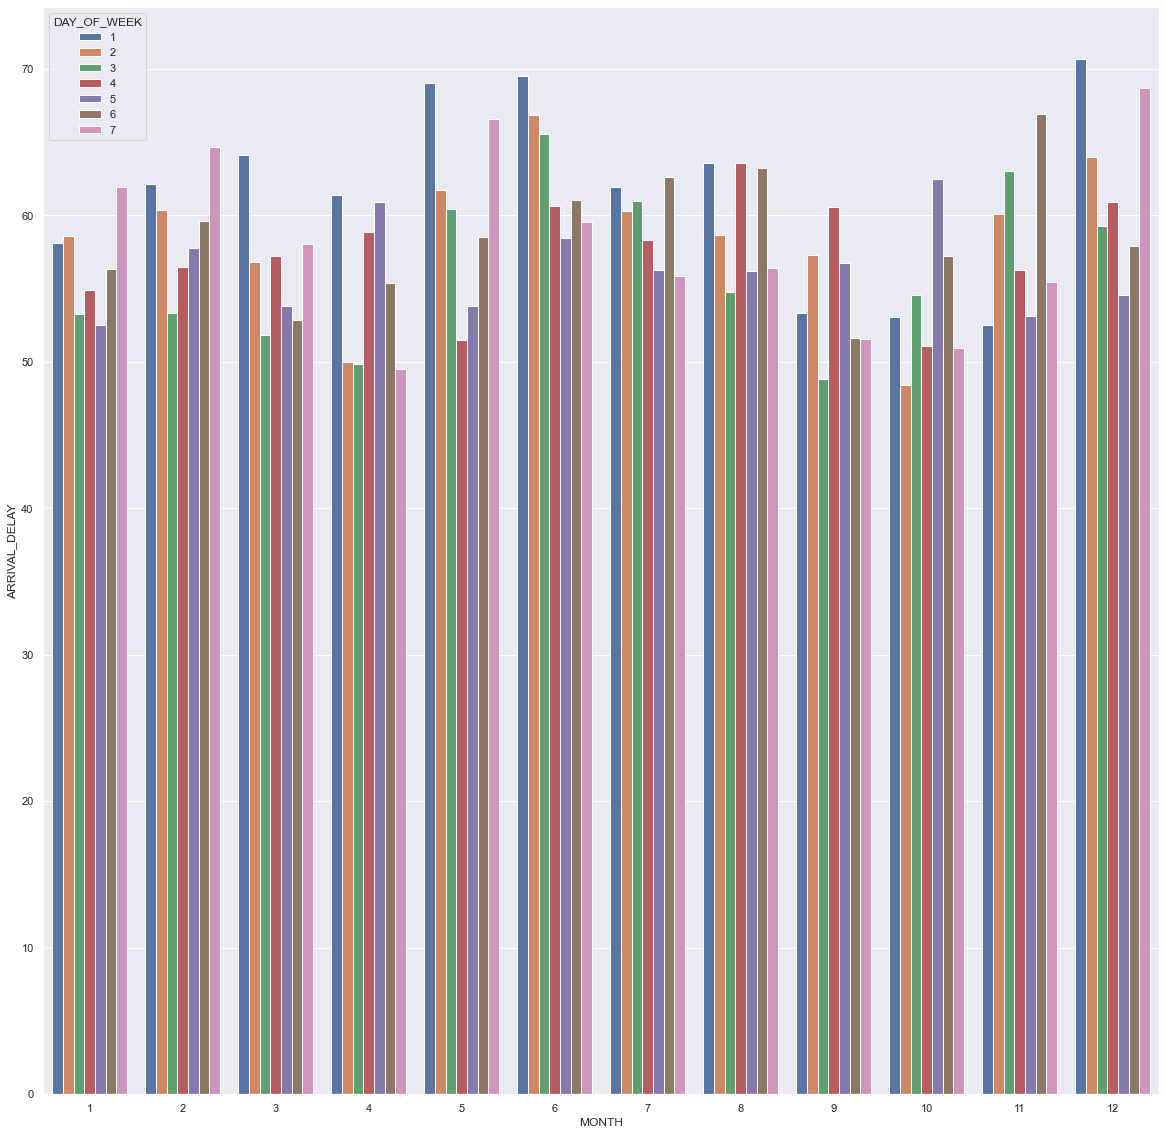

In [29]:
# group flights by month and days of week and take means of arrival delays
means = no_null_data.groupby(["MONTH", "DAY_OF_WEEK"], as_index=False)["ARRIVAL_DELAY"].mean()

# plot grouped data as nested barplot
sns.barplot(x="MONTH", y="ARRIVAL_DELAY", data=means, hue="DAY_OF_WEEK")

    Your answer:
Here is a list of which combination of weekdays and months you should avoid to decrease the possibility of the arrival delay:

1 - Monday, December

2 - Monday, June

3 - Friday, December

4 - Monday, May

5 - Tuesday, June

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

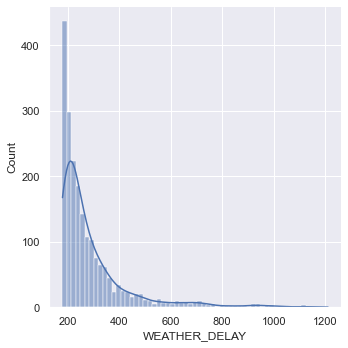

In [30]:
# get flights with at least 3h of weather delay
weather_delayed = no_null_data.query("WEATHER_DELAY >= 180")

# plot distribution
sns.displot(x="WEATHER_DELAY", data=weather_delayed, kde=True)

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

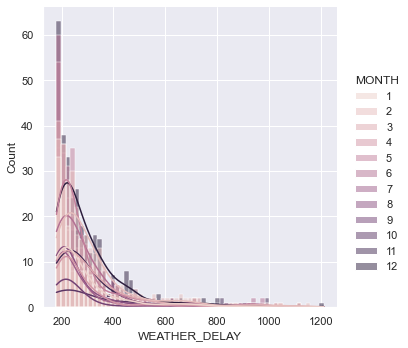

In [31]:
# get flights with at least 3h of weather delay
weather_delayed2 = no_null_data.query("WEATHER_DELAY > 180")

# plot distribution
sns.displot(x="WEATHER_DELAY", data=weather_delayed, kde=True, hue="MONTH")

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

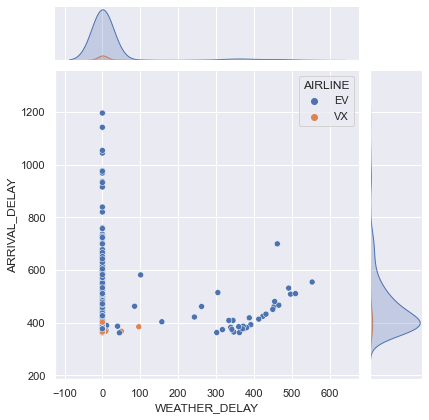

In [32]:
# query specified data
ev_vx_data = no_null_data.query("AIRLINE == 'EV' or AIRLINE == 'VX'").query("ARRIVAL_DELAY > 360")

sns.jointplot(data=ev_vx_data, x="WEATHER_DELAY", y="ARRIVAL_DELAY", kind="scatter", hue='AIRLINE')

       Your answer:

The main plot is a bivariate graph which shows how the ARRIVAL_DELAY (y) varies with the WEATHER_DELAY (x). In said plot, we can observe a positive correlation between the two features. That means both features grow together. This makes sense since ARRIVAL_DELAY is the sums of all types of delay, so a positive corrolation is to be expected.

We observe that for airline "EV" there is a line of values where all delay is caused by weather delay (the line forming in the bottem right corner of the scatterplot). This cannot be observed for airline "VX", mainly because there are not enough values for this airline over the 6h threshold.

Concerning the two airlines:<br>
Generally it can be said that airline "VX" has considerably less "extreme" delays than airline "EV". As for the distributions, they look quite similar for both airlines with respect to their mean, but since there are far more values above the 6h threshold for "EV" its distribution has larger values when both distributions are plotted in the same domain (as seen above).

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [33]:
# query specified data
ua_data = no_null_data.query("AIRLINE == 'UA' and ARRIVAL_DELAY > 0")

# create new column based on boolean condition
ua_data["DELAY"] = np.where(ua_data.ARRIVAL_DELAY <= 45, "acceptable_delay", "unacceptible_delay")

# calculate bins
min_dist = ua_data.DISTANCE.min()
max_dist = ua_data.DISTANCE.max()
middle = (max_dist-min_dist) / 2 + min_dist

# categorize distance values
ua_data["DISTANCE_CATEGORY"] = np.where(ua_data.DISTANCE < middle, "short", "long")

# check categorization
ua_data[["ARRIVAL_DELAY", "DELAY", "DISTANCE", "DISTANCE_CATEGORY"]].head()

ARRIVAL_DELAY               DELAY  DISTANCE DISTANCE_CATEGORY
211318          135.0  unacceptible_delay      1416             short
285648           23.0    acceptable_delay      2704              long
588848           17.0    acceptable_delay      1201             short
195800          206.0  unacceptible_delay       678             short
177282           17.0    acceptable_delay       967             short

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [34]:
from p_decision_tree.DecisionTree import DecisionTree

# convert all values to string
for col in ua_data.columns.tolist():
    ua_data[col] = ua_data[col].astype(str)

# split columns into descriptive and target values
desc_features = ua_data[['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']].columns
desc_data = ua_data[desc_features].values
label_data = ua_data["DELAY"].values

# calculate decision tree with minimum 1000 samples
decisionTree = DecisionTree(desc_data.tolist(), desc_features.tolist(), label_data.tolist(), "entropy")
decisionTree.id3(0, 1000)

# generate output with pdf
dot = decisionTree.print_visualTree(render=True)
print(dot)

# print system entropy
print("System entropy: ", format(decisionTree.entropy))

You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
// Decision Tree
digraph {
	root [label=SCHEDULED_DEPARTURE_CATEGORY]
	0.16045418180271642 [label=Morning]
	root -> 0.16045418180271642
	0.5597349748035172 [label=DAY_OF_WEEK]
	0.16045418180271642 -> 0.5597349748035172
	0.46966542887958407 [label=Evening]
	root -> 0.46966542887958407
	0.22951856811366245 [label=DAY_OF_WEEK]
	0.46966542887958407 -> 0.22951856811366245
	0.38771082817105973 [label=Afternoon]
	root -> 0.38771082817105973
	0.956324040063009 [label=DAY_OF_WEEK]
	0.38771082817105973 -> 0.956324040063009
	0.4616033809293344 [label=Night]
	root -> 0.4616033809293344
	0.6221139023481354 [label=DAY_OF_WEEK]
	0.4616033809293344 -> 0.6221139023481354
	0.5597349748035172 [label=DAY_OF_WEEK]
	0.9347495970075527 [label=1]
	0.5597349748035172 -> 0.9347495970075527
	0.8727875241574515 [label=DISTANCE_CATEGORY]
	0.9347495970075527 -> 0.8727875241574515
	0.674017775538784 [label=5]
	0.

#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
For every value of the SCHEDULED_DEPARTURE_CATEGORY feature which has been chosen by ID3 for the first round there has been chosen DAY_OF_THE_WEEK for the second round.

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
1. Flights on Tuesday afternoon (both short and long) and 
2. Short flights on Mondays in the evening/afternoon tend to have a delay more than 45 minutes.

An explanation for the rules could be an increased number of business flights on workdays.

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [35]:
# load data from csv into dataframe
df = pd.read_csv("flights_classifying.csv")

Randomly order the data points using one of the group member's students as the random state.

In [36]:
# shuffle data using Andreas' MatNr as random state
df.sample(frac=1, random_state=378233)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  YEAR  MONTH  DAY  \
206606      206606        862944          463613  2015      7   19   
508194      508194        913663          117739  2015      4   21   
295039      295039         36387          666071  2015      6   10   
106217      106217        771372          617921  2015      7   23   
311746      311746        342157           73004  2015      9    4   
...            ...           ...             ...   ...    ...  ...   
51602        51602        342587          244847  2015      7   16   
187681      187681        207033          252868  2015      7   29   
436728      436728        549685          125471  2015      5    9   
333192      333192         20676          831840  2015      3   20   
505892      505892        653773          390085  2015      9   18   

        DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  ...  \
206606            7      DL           1178      N910DE  ...   
508194            2      UA            242      N487UA  ...   
295039            3      WN           3209      N415WN  ...   
106217            4      F9            607      N228FR  ...   
311746            5      B6            593      N298JB  ...   
...             ...     ...            ...         ...  ...   
51602             4      OO           5300      N958SW  ...   
187681            3      B6           1336      N554JB  ...   
436728            6      B6           1170      N328JB  ...   
333192            5      US           1824      N520UW  ...   
505892            5      OO           6211      N786SK  ...   

       CANCELLATION_REASON AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
206606                   N              0.0            37.0            4.0   
508194                   N              9.0             0.0            0.0   
295039                   N              6.0             0.0           10.0   
106217                   N             32.0             0.0            0.0   
311746                   C              NaN             NaN            NaN   
...                    ...              ...             ...            ...   
51602                    N             25.0             0.0            0.0   
187681                   N              3.0             0.0          170.0   
436728                   N              0.0             0.0          159.0   
333192                   N             26.0             0.0            7.0   
505892                   N              0.0             0.0            0.0   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
206606                  1.0            0.0         200    28   
508194                 37.0            0.0         111    15   
295039                 30.0            0.0         161    23   
106217                  0.0            0.0         204    29   
311746                  NaN            NaN         247    35   
...                     ...            ...         ...   ...   
51602                  14.0            0.0         197    28   
187681                  0.0            0.0         210    30   
436728                  0.0            0.0         129    18   
333192                  0.0            0.0          79    11   
505892                 54.0            0.0         261    37   

        SCHEDULED_DEPARTURE_CATEGORY  REIMBURSMENT  
206606                     Afternoon             0  
508194                       Evening             0  
295039                     Afternoon             0  
106217                       Evening             0  
311746                     Afternoon             0  
...                              ...           ...  
51602                        Evening             0  
187681                       Evening             0  
436728                       Morning             0  
333192                       Morning             0  
505892                     Afternoon             0  

[579509 rows x 38 columns]

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [37]:
# drop cancelled flights
df = df.query("CANCELLED == 0")

# define boolean target feature
df["DELAYED_ENOUGH"] = np.where(df.ARRIVAL_DELAY > 180, 1, 0)

df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  YEAR  MONTH  DAY  DAY_OF_WEEK  \
0           0        661456          719293  2015      7   18            6   
1           1        110441          149900  2015      6   30            2   
2           2        129096          802487  2015      5   12            2   
3           3        850373          443114  2015      3   26            4   
4           4        731006          116526  2015      5   30            6   

  AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  ... AIR_SYSTEM_DELAY SECURITY_DELAY  \
0      DL           1962      N974AT  ...             21.0            0.0   
1      OO           5157      N768SK  ...              0.0            0.0   
2      EV           2632      N684JW  ...              6.0            0.0   
3      B6           2324      N284JB  ...             28.0            0.0   
4      MQ           3052      N622MQ  ...             17.0            0.0   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
0            0.0                  0.0            0.0         199    28   
1            0.0                 51.0            0.0         181    25   
2            1.0                  9.0            0.0         132    18   
3            0.0                  0.0            0.0          85    12   
4            0.0                 63.0            9.0         150    21   

   SCHEDULED_DEPARTURE_CATEGORY  REIMBURSMENT  DELAYED_ENOUGH  
0                       Morning             0               0  
1                       Evening             0               0  
2                     Afternoon             0               0  
3                       Morning             0               0  
4                     Afternoon             0               0  

[5 rows x 39 columns]

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# choose descriptive features 
desc_features = ["MONTH",
                 "DAY",
                 "DAY_OF_WEEK",
                 "SCHEDULED_DEPARTURE",
                 "DISTANCE",
                 "ELAPSED_TIME",
                 "AIRLINE",
                 "ORIGIN_AIRPORT",
                 "DESTINATION_AIRPORT"]

# reduce dataframe to chosen descriptive and target features
df_reduced = df[desc_features + ["DELAYED_ENOUGH"]]
df_reduced = df_reduced.dropna()

# Transform SCHEDULED_DEPARTURE to interval metric (minutes after 00:00)
def transformation(time):
    time = str(time)
    if len(time) < 3:
        return int(time)
    else:
        return int(time[-2:]) + 60 * int(time[:-2])

# apply transformation
df_reduced["SCHEDULED_DEPARTURE"] = df_reduced["SCHEDULED_DEPARTURE"].astype(str)
df_reduced["SCHEDULED_DEPARTURE"] = df_reduced["SCHEDULED_DEPARTURE"].transform(transformation)

# create one hot encoding
df_reduced_OneHot = pd.get_dummies(df_reduced, dtype=bool)


# split data frame in descriptive (X) and target (y)
df_desc = df_reduced_OneHot.loc[:, df_reduced_OneHot.columns != "DELAYED_ENOUGH"]
df_target = df_reduced_OneHot["DELAYED_ENOUGH"]

df_reduced_OneHot.head()

MONTH  DAY  DAY_OF_WEEK  SCHEDULED_DEPARTURE  DISTANCE  ELAPSED_TIME  \
0      7   18            6                  532       453         130.0   
1      6   30            2                 1270       936         127.0   
2      5   12            2                 1000       190          70.0   
3      3   26            4                  510       759         159.0   
4      5   30            6                 1020       113          77.0   

   DELAYED_ENOUGH  AIRLINE_AA  AIRLINE_AS  AIRLINE_B6  ...  \
0               0       False       False       False  ...   
1               0       False       False       False  ...   
2               0       False       False       False  ...   
3               0       False       False        True  ...   
4               0       False       False       False  ...   

   DESTINATION_AIRPORT_TYS  DESTINATION_AIRPORT_UST  DESTINATION_AIRPORT_VEL  \
0                    False                    False                    False   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   

   DESTINATION_AIRPORT_VLD  DESTINATION_AIRPORT_VPS  DESTINATION_AIRPORT_WRG  \
0                    False                    False                    False   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   

   DESTINATION_AIRPORT_WYS  DESTINATION_AIRPORT_XNA  DESTINATION_AIRPORT_YAK  \
0                    False                    False                    False   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   

   DESTINATION_AIRPORT_YUM  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 667 columns]

We chose the following descriptive features:
* MONTH, DAY, DAY_OF_WEEK, SCHEDULED_DEPARTURE: To find potential patterns of when heavily delayed flights are scheduled.
* AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT: To exploit bad organisation of airliners on specfic airports
* DISTANCE, ELAPSED_TIME: To correlate the preceding features to flight distance for more refined predicitons

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [39]:
from sklearn.model_selection import train_test_split

# split in a trainig and test set and stratify to re-balance classes
train_desc, test_desc, train_target, test_target = train_test_split(df_desc, df_target, test_size=0.15, random_state=378233, stratify=df_target)

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [40]:
from sklearn.metrics import classification_report

    Your answer:
Since we are dealing with a categorical target feature, we need to evaluate our predictions against confusion matrix based evaluation metrics. We are trying to maximize the amount of delayed flights in the set of flights that our model is suggesting us to take. A suitable metric for that purpose is the precision metric, since it measures the rate of true positives in all positively predicted instances.
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [41]:
# count True and False instances in target data
counts = np.unique(test_target, return_counts=True)
false_count = counts[1][0]
true_count = counts[1][1]

# Baseline precision is rate of true instances in data
print("Baseline precision:", true_count/(true_count+false_count))


Baseline precision: 0.07195768538014663


    Your answer:
If we guess all flights to be delayed more than 3 hours, we get a precision of 0.072. This is the baseline value for our precision.
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create parameter dict for grid
param_grid_regr = {'C': [0.001,0.01,0.1,1],
             'penalty':['l2','l1'],
             'class_weight':['balanced']}

# create grid and fit it to training data
grid_regr = GridSearchCV(LogisticRegression(solver = 'liblinear', multi_class = 'ovr'), param_grid_regr, cv = 5, verbose = 3)
grid_regr.fit(train_desc, train_target)

# print best parameters found
print(grid_regr.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.589 total time=  12.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.591 total time=  12.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.589 total time=  11.6s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.584 total time=  12.2s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.587 total time=  12.1s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.569 total time=  12.4s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.569 total time=  12.8s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.572 total time=  12.5s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.566 total time=  12.4s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.567 total time=  12.1s
[CV 1/5] END C=0.01, class_weight=balanced, penalt

In [43]:
def create_report(grid: GridSearchCV, desc, target):
    # test trained model against test data
    predict = grid.predict(desc)
    target = np.array(target)
    predict = np.array(predict)

    # create classification report about predicted data
    return classification_report(target, predict, output_dict=True)

In [44]:
# print precision
report = create_report(grid_regr, desc=test_desc, target=test_target)
precision = report["1"]["precision"]
print("Precision of regression:", report["1"]["precision"])

Precision of regression: 0.10062224920321748


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [45]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# drop nominal attributes
df_desc = df_reduced[["MONTH", "DAY", "DAY_OF_WEEK", "SCHEDULED_DEPARTURE", "DISTANCE", "ELAPSED_TIME"]]
df_target = df_reduced["DELAYED_ENOUGH"]

#sample new train and test data, stratify needs to be set to have due to imbalanced classes
desc_train_svm,desc_test_svm, target_train_svm,target_test_svm = train_test_split(df_desc, df_target, train_size=0.05, random_state=378233, stratify= df_reduced['DELAYED_ENOUGH'])

sm = SMOTE(random_state=378233)
x_train, y_train = sm.fit_resample(desc_train_svm, target_train_svm)


param_grid = {'C': [0.01],
              'kernel': ["poly", "sigmoid"]}  
grid_svm = GridSearchCV(SVC(max_iter=1000000), param_grid, cv = 5, verbose = 3) 

grid_svm.fit(x_train, y_train)

# print best parameters found
print(grid_svm.best_params_)



Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...............C=0.01, kernel=poly;, score=0.553 total time=  24.7s
[CV 2/5] END ...............C=0.01, kernel=poly;, score=0.544 total time=  25.1s
[CV 3/5] END ...............C=0.01, kernel=poly;, score=0.546 total time=  25.3s
[CV 4/5] END ...............C=0.01, kernel=poly;, score=0.542 total time=  25.2s
[CV 5/5] END ...............C=0.01, kernel=poly;, score=0.542 total time=  25.0s
[CV 1/5] END ............C=0.01, kernel=sigmoid;, score=0.527 total time=  33.5s
[CV 2/5] END ............C=0.01, kernel=sigmoid;, score=0.528 total time=  33.8s
[CV 3/5] END ............C=0.01, kernel=sigmoid;, score=0.529 total time=  33.7s
[CV 4/5] END ............C=0.01, kernel=sigmoid;, score=0.533 total time=  33.7s
[CV 5/5] END ............C=0.01, kernel=sigmoid;, score=0.482 total time=  34.4s
{'C': 0.01, 'kernel': 'poly'}


In [46]:
# print precision
report = create_report(grid_svm, desc=desc_test_svm, target=target_test_svm)
print("Precision of svm:", report["1"]["precision"])

Precision of svm: 0.07918474815934468


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [47]:

from sklearn.neural_network import MLPClassifier

parameters_mplc = {
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1, 0.05, 0.5,],
    'learning_rate': ['constant','adaptive'],
}

grid_mplc = GridSearchCV(MLPClassifier(random_state=378233), parameters_mplc, n_jobs=-1, cv=5)
grid_mplc.fit(x_train, y_train)
# print best parameters found
print(grid_mplc.best_params_)


{'activation': 'tanh', 'alpha': 0.5, 'learning_rate': 'constant'}


In [48]:
# print precision
report = create_report(grid_mplc, desc=desc_test_svm, target=target_test_svm)
print("Precision of neural network:", report["1"]["precision"])

Precision of neural network: 0.08979133607521833


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [49]:
#calculate the price for which the model is profitable
price = precision*150
print(f'Price for which the model is profitable: {price}EUR')

Price for which the model is profitable: 15.093337380482621EUR


    Your answer:
All models increase the likelihood of getting a delayed flight in comarison to a random selection.

The SVM and Neural Network yield a lower precision than the regression model, since we had to omit the nominal features in order to reduce computational complexity. This seemed to have a slight negatie effect on precision. The neural network had a higher precision than the SVM, as expected (chapter 8, slide 86 - trade-off between explainability and precision).

To find the flight price for which our model is profitable, we need to know what the precision of our model is.

This is done above for the case of regression. The precision resembles the probability that a flight from the test set predicted to be refunded will actually be refunded. Therefore the flight ticket needs to cost at most 15.09 Euros if we want our model to be profitable.
  
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [50]:
# Remove all irrelevant flights
clustering_dataset = no_null_data.query("WEATHER_DELAY <= 600 and LATE_AIRCRAFT_DELAY <= 600")

# create new AIR_TIME_DELAY feature
clustering_dataset["AIR_TIME_DELAY"] = clustering_dataset.ELAPSED_TIME - clustering_dataset.SCHEDULED_TIME

print('No. of Rows, No of Columns')
print(clustering_dataset.shape)

clustering_dataset[["AIR_TIME_DELAY", "SCHEDULED_TIME", "ELAPSED_TIME"]].head(10)

No. of Rows, No of Columns
(808056, 37)


AIR_TIME_DELAY  SCHEDULED_TIME  ELAPSED_TIME
574311           -17.0           210.0         193.0
498532            -4.0           115.0         111.0
306002            -5.0           117.0         112.0
87164              5.0            85.0          90.0
735595           -19.0           165.0         146.0
516855            33.0            83.0         116.0
427292           -10.0           161.0         151.0
595292            23.0           106.0         129.0
878564            10.0            75.0          85.0
160351            36.0           164.0         200.0

    Your answer:
Negative air time delay: The flight took less time than it was sheduled to take. The flights total delay is reduced.<br>
Positive air time delay: The flight took longer than it was scheduled to take. The flights total delay is increased.

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [51]:
from sklearn.cluster import KMeans

# query specified features
k_means_df = clustering_dataset[["AIR_TIME_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY"]]

# initialize KMeans fitter with k=5 and 5 centroid seeds and fit to dataset
kmeans = KMeans(n_clusters=5, n_init=5).fit(k_means_df)

# get clusters and count number of samples 
clusters = kmeans.labels_
counts = np.unique(clusters, return_counts=True)[1]
centroids = kmeans.cluster_centers_

#creating consistent labeling for every run of k-means 
#to be able to talk consistenly about clusters
list_counts = counts.tolist()

#create a list with items of type (count, centroid)
#in order of algorithm detection
count_centroids = []
for i in range(0,len(list_counts)):
    count_centroids.append((counts[i], centroids[i]))

#sort count_centroids with ascending count
od_count = sorted(count_centroids)

#find the same (count, centroid) tuple in ordered and unordered list
#generates array that holds new labeling
reordered_index=[]
for i in range(0, len(count_centroids)):
    for j in range(0, len(od_count)):
        if (count_centroids[i] == od_count[j]):
            reordered_index.append(j)
            
#define mapping function to map labels to coherent labels
def map(i, l):
    if i == 0:
        return l[0]
    if i == 1:
        return l[1]
    if i == 2:
        return l[2]
    if i == 3:
        return l[3]
    if i == 4:
        return l[4]

#map the clusters ids to the ordered labeling
clusters = clusters.tolist()
correct_clusters = []
for item in clusters:
    correct_clusters.append(map(item, reordered_index))

# print cluster id, number of samples, and centroid for each cluster
i = 1
for item in od_count:
    print("Cluster", str(i), item[0], item[1])
    i+=1
    
# create new CLUSTER column
def transform_cluster(cluster):
   return "c" + str(cluster + 1)

clustering_dataset["CLUSTER"] = correct_clusters
clustering_dataset["CLUSTER"] = clustering_dataset["CLUSTER"].transform(transform_cluster)

Cluster 1 8314 [  8.95215196 149.20726136   8.43568165]
Cluster 2 25059 [ -4.16067108   2.48967575 194.27702049]
Cluster 3 118831 [-3.39088935  1.13629783 73.54243893]
Cluster 4 215924 [27.25966935  1.39256738  2.48710753]
Cluster 5 439928 [-5.08229062  1.22254859 10.77440049]


    Your answer:
Running the k-means clustering algorithm with different centroid seeds is necessary, since k-means only finds local maxima. Different seeds therefore increase the chance of finding better local maxima, or even a global maximum.

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

c1
WEATHER_DELAY min: 75.0 max: 595.0 mean: 149.24248255953813
AIR_TIME_DELAY min: -61.0 max: 198.0 mean: 8.953091171517922
LATE_AIRCRAFT_DELAY min: 0.0 max: 237.0 mean: 8.439740197257638
c2
WEATHER_DELAY min: 0.0 max: 226.0 mean: 2.4637854662995333
AIR_TIME_DELAY min: -66.0 max: 211.0 mean: -4.1848836745281135
LATE_AIRCRAFT_DELAY min: 134.0 max: 600.0 mean: 193.6443992178459
c3
WEATHER_DELAY min: 0.0 max: 112.0 mean: 1.1398035866061886
AIR_TIME_DELAY min: -76.0 max: 148.0 mean: -3.367984785114995
LATE_AIRCRAFT_DELAY min: 42.0 max: 134.0 mean: 73.33284244010402
c4
WEATHER_DELAY min: 0.0 max: 92.0 mean: 1.391619273448065
AIR_TIME_DELAY min: 10.0 max: 330.0 mean: 27.259670069098387
LATE_AIRCRAFT_DELAY min: 0.0 max: 102.0 mean: 2.4844158129712306
c5
WEATHER_DELAY min: 0.0 max: 77.0 mean: 1.223475205033551
AIR_TIME_DELAY min: -105.0 max: 19.0 mean: -5.086459602480406
LATE_AIRCRAFT_DELAY min: 0.0 max: 43.0 mean: 10.754703042316015


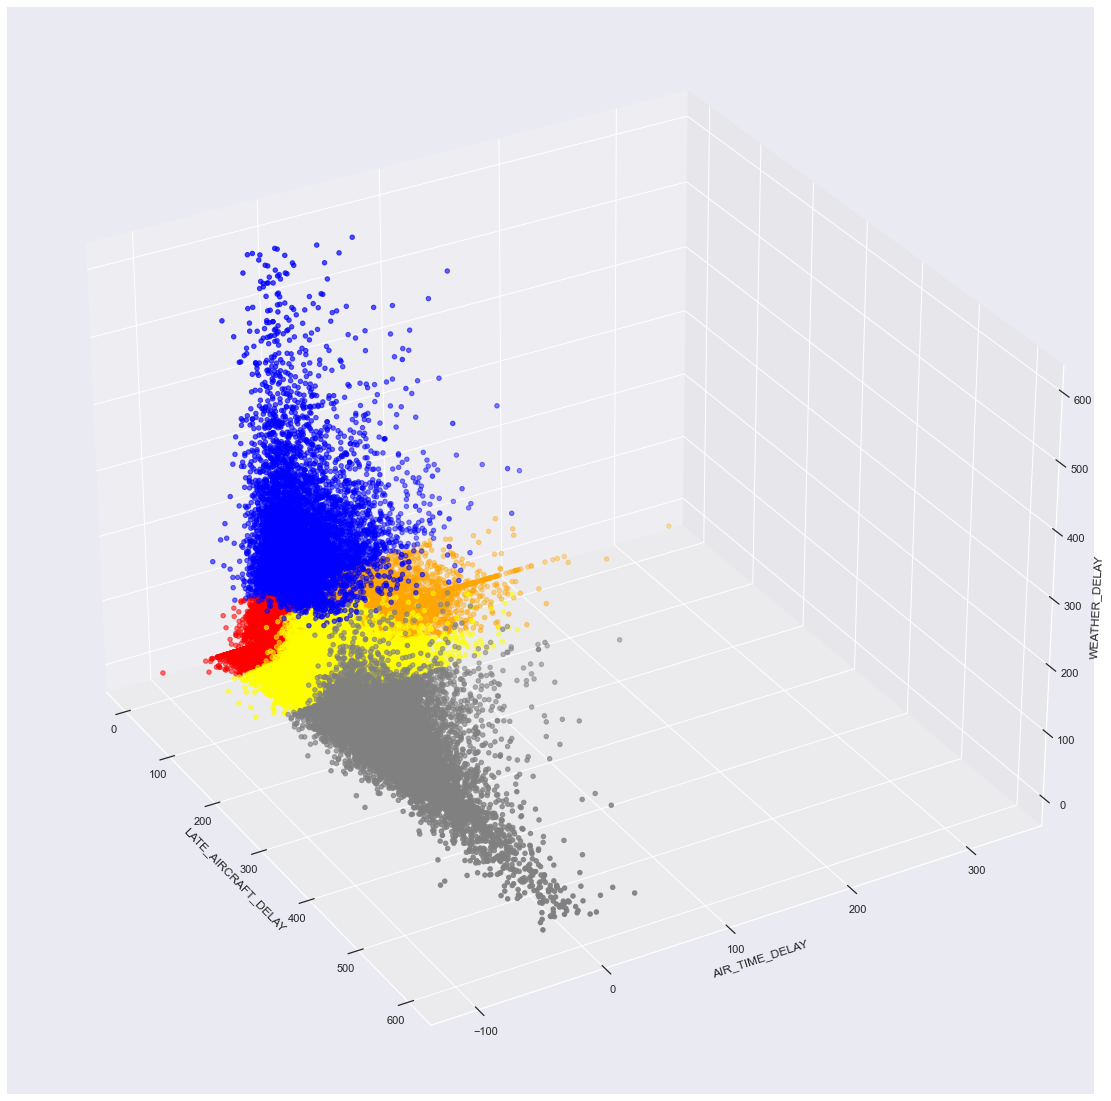

In [52]:
#create 3D diagram from three features

# define colour map for 3D clusters
LABEL_COLOR_MAP = {0 : 'blue',
                   1 : 'gray',
                   2 : 'yellow',
                   3 : 'orange',
                   4 : 'red'}

# assign colours to points according to clusters
label_color = [LABEL_COLOR_MAP[l] for l in correct_clusters]


# create 3D diagram from three features
fig = plt.figure()
ax = plt.axes(projection='3d')


ydata = k_means_df["AIR_TIME_DELAY"]
ax.set_ylabel('AIR_TIME_DELAY')

xdata = k_means_df["LATE_AIRCRAFT_DELAY"]
ax.set_xlabel('LATE_AIRCRAFT_DELAY')

zdata = k_means_df["WEATHER_DELAY"]
ax.set_zlabel('WEATHER_DELAY')

ax.scatter3D(xdata, ydata, zdata, c=label_color)

ax.view_init(30, -30)

def min_max_values(clusterId):
    c = clustering_dataset.loc[(clustering_dataset['CLUSTER'] == clusterId)]
    print(clusterId)
    print("WEATHER_DELAY", "min:", c["WEATHER_DELAY"].min(), "max:", c["WEATHER_DELAY"].max(), "mean:", c["WEATHER_DELAY"].mean())
    print("AIR_TIME_DELAY", "min:", c["AIR_TIME_DELAY"].min(), "max:", c["AIR_TIME_DELAY"].max(), "mean:", c["AIR_TIME_DELAY"].mean())
    print("LATE_AIRCRAFT_DELAY", "min:", c["LATE_AIRCRAFT_DELAY"].min(), "max:", c["LATE_AIRCRAFT_DELAY"].max(), "mean:", c["LATE_AIRCRAFT_DELAY"].mean())

min_max_values('c1')
min_max_values('c2') 
min_max_values('c3')
min_max_values('c4')
min_max_values('c5')

    Your answer:
We have found the following clusters:


### Cluster 1 (Blue) includes 8304 points:


**WEATHER_DELAY** (min: 75.0 max: 595.0, mean: 149.3226156069364)

**AIR_TIME_DELAY** (min: -61.0 max: 198.0, mean: 8.946290944123314)

**LATE_AIRCRAFT_DELAY** (min: 0.0 max: 237.0, mean: 8.423410404624278)

Cluster 1 holds the flights which generally have a high WEATHER_DELAY, but dont suffer extreme AIR_TIME_DELAY or LATE_AIRCRAFT_DELAY.

### Cluster 2 (Gray) includes 26427 points:

**WEATHER_DELAY** (min: 0.0 max: 226.0 mean: 2.428993075263935)

**AIR_TIME_DELAY** (min: -66.0 max: 211.0 mean: -4.14697090097249)

**LATE_AIRCRAFT_DELAY** (min: 130.0 max: 600.0 mean: 190.45968138646083)

Cluster 2 holds the flights which generally have a high LATE_AIRCRAFT_DELAY, but an on average negative AIR_TIME_DELAY and a small WEATHER_DELAY.

### Cluster 3 (Yellow) includes 122055 points:

**WEATHER_DELAY** (min: 0.0 max: 112.0 mean: 1.1205358240137644)

**AIR_TIME_DELAY** (min: -76.0 max: 148.0 mean: -3.378141002007292)

**LATE_AIRCRAFT_DELAY** (min: 41.0 max: 131.0 mean: 71.48256114046946)

Cluster 3 holds all flights which generally have a negative AIR_TIME_DELAY, a small WEATHER_DELAY, but LATE_AIRCRAFT_DELAY on average at around 72 minutes.

### Cluster 4 (Orange) includes 215860 points:

**WEATHER_DELAY** (min: 0.0 max: 92.0 mean: 1.390799592328361)

**AIR_TIME_DELAY** (min: 10.0 max: 330.0 mean: 27.25838506439359)

**LATE_AIRCRAFT_DELAY** (min: 0.0 max: 102.0 mean: 2.477351060872788)

Cluster 4 holds all flights which generally have small LATE_AIRCRAFT_DELAY and WEATHER_DELAY, but an average AIR_TIME_DELAY of 27 minutes.


### Cluster 5 (Red) includes 435410 points:

**WEATHER_DELAY** (min: 0.0 max: 77.0 mean: 1.230013091109529)

**AIR_TIME_DELAY** (min: -105.0 max: 19.0 mean: -5.095627110080154)

**LATE_AIRCRAFT_DELAY** (min: 0.0 max: 42.0 mean: 10.431241818056545) 

Cluster 5 holds all the data that have a low LATE_AIRCRAFT_DELAY and WEATHER_DELAY, but mostly negative AIR_TIME_DELAY.

## Conclusion

This shows that the 5-means clustering algorithm found 5 clusters, which include similar items, but are different compared to each other. 

We originally set out to find out whether it was possible to compensate for a given delay type by having a negative AIR_TIME_DELAY.

From our 3D scatter graph, we can see that in Cluster 1 (Blue), on average points with a high WEATHER_DELAY, also have a positive AIR_TIME_DELAY. If we take a look at Cluster 2 (Gray), we can see that on average points with a high LATE_AIRCRAFT_DELAT, also have a negative AIR_TIME_DELAY. Cluster 3(Yellow) supports this aswell.

Cluster 4 and 5 represent the effect of a positive and negative AIR_TIME_DELAY (respectively), on flights which do not have much WEATHER_DELAY and LATE_AIRCRAFT_DELAY.

In conclusion, the data indicates that it is possible for a pilot to compensate LATE_AIRCRAFT_DELAY by flying faster (and thus having negative AIR_TIME_DELAY). The same does not hold for WEATHER_DELAY.